## Welcome

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()

Chargement des données

In [4]:
dataset = pd.read_csv('weatherAUS.csv')

In [5]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
dataset['Location'].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Adelaide            3193
Darwin              3193
Perth               3193
Melbourne           3193
Hobart              3193
MountGambier        3040
Launceston          3040
Townsville          3040
GoldCoast           3040
Ballarat            3040
Cairns              3040
Albury              3040
AliceSprings        3040
MountGinini         3040
Albany              3040
Bendigo             3040
Wollongong          3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
Watsonia            3009
Mildura             3009
CoffsHarbour        3009
Williamtown         3009
PerthAirport        3009
MelbourneAirport    3009
SydneyAirport       3009
Richmond            3009
WaggaWagga          3009
Moree               3009
Portland            3009
Woomera             3009
Dartmoor            3009
Witchcliffe         3009
PearceRAAF          3009
Cobar               3009
Sale                3009


In [7]:
data = dataset.copy()

In [8]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
data.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2015-12-31,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [11]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

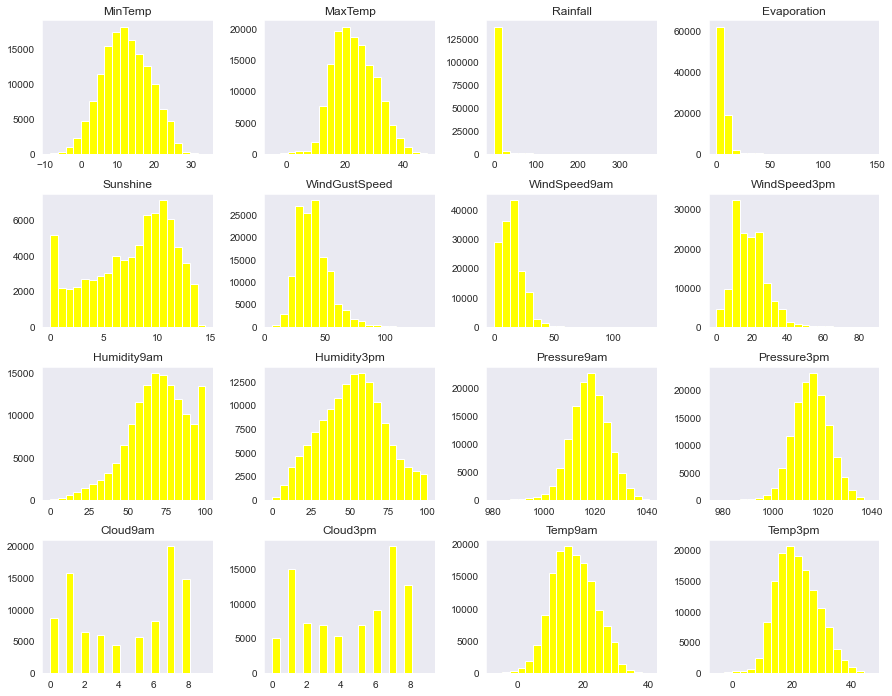

In [12]:
data.hist(bins=20,figsize = (15,12),grid = False,color="yellow");

<AxesSubplot:title={'center':'Rain Today ?'}>

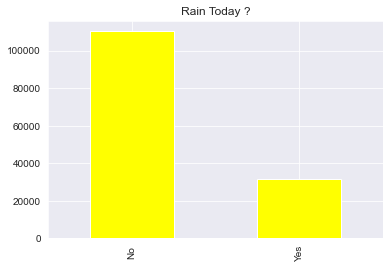

In [13]:
plt.figure(figsize=(6, 4))
data['RainToday'].value_counts().plot(kind="bar", color="yellow", title="Rain Today ?")

<AxesSubplot:title={'center':'Rain Tomorrow ?'}>

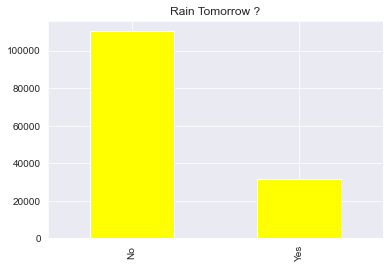

In [14]:
plt.figure(figsize=(6, 4))
data['RainTomorrow'].value_counts().plot(kind="bar", color="yellow", title="Rain Tomorrow ?")

In [15]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [16]:
X = data.drop(columns=['Date', 'Location', 'Rainfall','RainTomorrow'], axis=1)
X.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [17]:
X.isnull().sum()
Y = data['RainTomorrow']
Y.isnull().sum()

3267

In [18]:
X.shape, Y.shape

((145460, 19), (145460,))

In [19]:
X

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,3.6,25.3,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,5.4,26.9,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No
145458,7.8,27.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


In [20]:
Y

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [21]:
# changing the type of the column from String to category
X['WindGustDir'] = X['WindGustDir'].astype('category')
X['WindDir9am'] = X['WindDir9am'].astype('category')
X['WindDir3pm'] = X['WindDir3pm'].astype('category')
X['RainToday'] = X['RainToday'].astype('category')

X.dtypes

MinTemp           float64
MaxTemp           float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday        category
dtype: object

In [22]:
# category encoding
X['WindGustDir_cat'] = X['WindGustDir'].cat.codes
X['WindDir9am_cat'] = X['WindDir9am'].cat.codes
X['WindDir3pm_cat'] = X['WindDir3pm'].cat.codes
X['RainToday_cat'] = X['RainToday'].cat.codes

X.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir_cat,WindDir9am_cat,WindDir3pm_cat,RainToday_cat
0,13.4,22.9,NaN,NaN,W,44.0,W,WNW,20.0,24.0,...,1007.1,8.0,NaN,16.9,21.8,No,13,13,14,0
1,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,...,1007.8,NaN,NaN,17.2,24.3,No,14,6,15,0
2,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,...,1008.7,NaN,2.0,21.0,23.2,No,15,13,15,0
3,9.2,28.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,...,1012.8,NaN,NaN,18.1,26.5,No,4,9,0,0
4,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,...,1006.0,7.0,8.0,17.8,29.7,No,13,1,7,0


In [23]:
# removing the originals columns
X = X.drop(columns=['WindGustDir','WindDir9am','WindDir3pm','RainToday'], axis=1)

In [24]:
# changing the type of the column from category to String
X['WindGustDir_cat'] = X['WindGustDir_cat'].astype('float')
X['WindDir9am_cat'] = X['WindDir9am_cat'].astype('float')
X['WindDir3pm_cat'] = X['WindDir3pm_cat'].astype('float')
X['RainToday_cat'] = X['RainToday_cat'].astype('float')

In [25]:
features = list(X.columns)

In [26]:
features

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'WindGustDir_cat',
 'WindDir9am_cat',
 'WindDir3pm_cat',
 'RainToday_cat']

In [27]:
X.dtypes

MinTemp            float64
MaxTemp            float64
Evaporation        float64
Sunshine           float64
WindGustSpeed      float64
WindSpeed9am       float64
WindSpeed3pm       float64
Humidity9am        float64
Humidity3pm        float64
Pressure9am        float64
Pressure3pm        float64
Cloud9am           float64
Cloud3pm           float64
Temp9am            float64
Temp3pm            float64
WindGustDir_cat    float64
WindDir9am_cat     float64
WindDir3pm_cat     float64
RainToday_cat      float64
dtype: object

In [28]:
X = X[features].values

In [29]:
X

array([[13.4, 22.9,  nan, ..., 13. , 14. ,  0. ],
       [ 7.4, 25.1,  nan, ...,  6. , 15. ,  0. ],
       [12.9, 25.7,  nan, ..., 13. , 15. ,  0. ],
       ...,
       [ 5.4, 26.9,  nan, ...,  9. , 14. ,  0. ],
       [ 7.8, 27. ,  nan, ..., 10. ,  3. ,  0. ],
       [14.9,  nan,  nan, ...,  2. ,  2. ,  0. ]])

In [30]:
#entrainement, validation, test --> SKLEARN
import sklearn
from sklearn import model_selection
import sklearn.model_selection
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np

In [31]:
X.shape

(145460, 19)

In [32]:
data_dummies = pd.get_dummies(Y)
print(data_dummies.shape)
# Le OneHotEncoder transforme cette immense matrice en matrice creuse (sparse matrix en anglais)
Y_oneHot = OneHotEncoder().fit_transform(data_dummies)

(145460, 2)


In [33]:
test_ratio = 0.5
seed = 10

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = test_ratio, random_state = seed)

In [34]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
models = [
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('BernoulliNBClassifier', BernoulliNB()),
    ('GaussianNBClassifier', GaussianNB()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())]

In [36]:
def confusion_matrix(test_Y,predict_Y, plot_title):
    C = confusion_matrix(test_Y, predict_Y)
    labels = [0, 1, 2]
    cmap = sns.light_palette('yellow')
    print("-"*2, "Confusion matrix", "-"*2)
    plt.figure(figsize=(2,8))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title(plot_title)
    plt.show()
    print(np.matrix(plt.show()))

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
model_score = []
for name, model in models :
    model.fit(X_train, Y_train)
    ts_score = models.score(X,Y)
    pred = model.predict(X_test)
    print(name)
    print("Train score:",model.score(X_test,Y_test),"\nTest score:",ts_score)
    cm = confusion_matrix(Y, pred)
    print("Confusion Matrix\n",cm)
    model_score.append((name,ts_score))
    confusion_matrix(Y,pred, name)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').